In [ ]:
from google.colab import files

# Unggah file dari komputer
uploaded = files.upload()


Saving Kredivo.xlsx to Kredivo.xlsx


In [ ]:
# Instalasi library yang dibutuhkan
!pip install openpyxl
!pip install seaborn
!pip install matplotlib
!pip install scikit-learn
!pip install nltk


In [ ]:
import nltk

# Mendownload dataset NLTK
print("Mendownload data NLTK...")
nltk.download('punkt')
nltk.download('stopwords')


Mendownload data NLTK...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import pandas as pd

# Load file Excel
file_path = '/content/Kredivo.xlsx'  # Lokasi file di Google Colab
try:
    df = pd.read_excel(file_path)
    print("File berhasil dibaca!")
    print(df.head())
except FileNotFoundError:
    print("File tidak ditemukan, pastikan file sudah diupload!")


File berhasil dibaca!
          UserName  Score                  At  \
0  Pengguna Google      5 2024-09-08 02:58:00   
1  Pengguna Google      5 2024-09-08 02:58:00   
2  Pengguna Google      1 2024-09-08 02:56:00   
3  Pengguna Google      5 2024-09-08 02:55:00   
4  Pengguna Google      5 2024-09-08 02:54:00   

                                             Content  
0  Kredivo sangan membatu thebest bnget. Tapi ada...  
1                                          Membantu…  
2  Perhatian ,Tolong para pengguna dan yg punya a...  
3                                               Kren  
4  aplikasi yang sangat membantu kebutuhan dengan...  


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

# Preprocessing text
def preprocess_text(text):
    # Convert to lowercase
    text = str(text).lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english') + stopwords.words('indonesian'))
    tokens = [word for word in tokens if word not in stop_words]
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

# Convert score to sentiment
def convert_rating_to_sentiment(rating):
    if rating >= 4:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    else:
        return 'negative'

# Analisis sentimen
def analyze_sentiments():
    # Load dataset
    file_path = '/content/Kredivo.xlsx'
    df = pd.read_excel(file_path)
    df = df.rename(columns={
        'UserName': 'username',
        'Score': 'score',
        'At': 'at',
        'Content': 'content'
    })
    # Preprocess text
    df['cleaned_content'] = df['content'].apply(preprocess_text)
    df['sentiment'] = df['score'].apply(convert_rating_to_sentiment)

    # Split dataset
    X = df['cleaned_content']
    y = df['sentiment']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # TF-IDF Vectorizer
    vectorizer = TfidfVectorizer(max_features=5000)
    X_train_vectorized = vectorizer.fit_transform(X_train)
    X_test_vectorized = vectorizer.transform(X_test)

    # Train model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_vectorized, y_train)

    # Evaluate model
    y_pred = model.predict(X_test_vectorized)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred, labels=['positive', 'neutral', 'negative'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['positive', 'neutral', 'negative'], yticklabels=['positive', 'neutral', 'negative'])
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    return model, vectorizer

# Jalankan analisis
nltk.download('punkt')
nltk.download('stopwords')
model, vectorizer = analyze_sentiments()

# Prediksi teks baru
def predict_sentiment(model, vectorizer, text):
    cleaned_text = preprocess_text(text)
    vectorized_text = vectorizer.transform([cleaned_text])
    prediction = model.predict(vectorized_text)
    return prediction[0]

# Contoh penggunaan
text = "Aplikasi ini sangat membantu, namun terkadang lambat."
print(f"Prediksi sentimen: {predict_sentiment(model, vectorizer, text)}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
import nltk

# Mendownload dataset NLTK
print("Mendownload data NLTK...")
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')  # Tambahkan ini jika belum ada


Mendownload data NLTK...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Classification Report:
              precision    recall  f1-score   support

    negative       0.75      0.69      0.72      2622
     neutral       0.08      0.00      0.00       478
    positive       0.94      0.98      0.96     16899

    accuracy                           0.91     19999
   macro avg       0.59      0.55      0.56     19999
weighted avg       0.89      0.91      0.90     19999



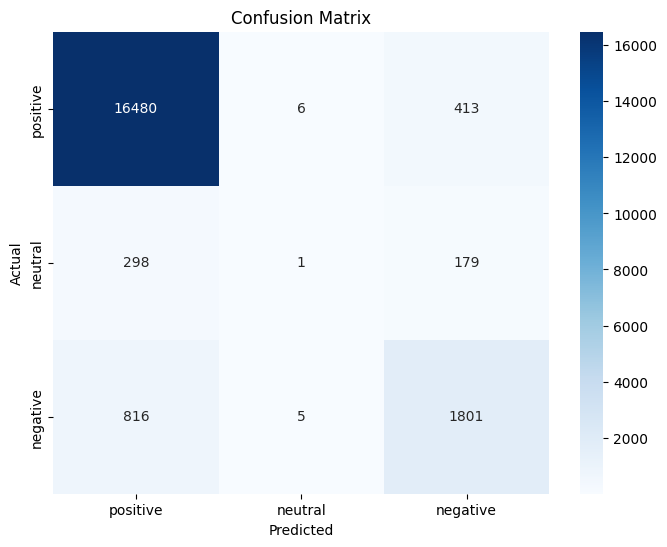

Prediksi sentimen: positive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

# Preprocessing text
def preprocess_text(text):
    # Convert to lowercase
    text = str(text).lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english') + stopwords.words('indonesian'))
    tokens = [word for word in tokens if word not in stop_words]
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

# Convert score to sentiment
def convert_rating_to_sentiment(rating):
    if rating >= 4:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    else:
        return 'negative'

# Analisis sentimen
def analyze_sentiments():
    # Load dataset
    file_path = '/content/Kredivo.xlsx'
    df = pd.read_excel(file_path)
    df = df.rename(columns={
        'UserName': 'username',
        'Score': 'score',
        'At': 'at',
        'Content': 'content'
    })
    # Preprocess text
    df['cleaned_content'] = df['content'].apply(preprocess_text)
    df['sentiment'] = df['score'].apply(convert_rating_to_sentiment)

    # Split dataset
    X = df['cleaned_content']
    y = df['sentiment']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # TF-IDF Vectorizer
    vectorizer = TfidfVectorizer(max_features=5000)
    X_train_vectorized = vectorizer.fit_transform(X_train)
    X_test_vectorized = vectorizer.transform(X_test)

    # Train model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_vectorized, y_train)

    # Evaluate model
    y_pred = model.predict(X_test_vectorized)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred, labels=['positive', 'neutral', 'negative'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['positive', 'neutral', 'negative'], yticklabels=['positive', 'neutral', 'negative'])
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    return model, vectorizer

# Jalankan analisis
nltk.download('punkt')
nltk.download('stopwords')
model, vectorizer = analyze_sentiments()

# Prediksi teks baru
def predict_sentiment(model, vectorizer, text):
    cleaned_text = preprocess_text(text)
    vectorized_text = vectorizer.transform([cleaned_text])
    prediction = model.predict(vectorized_text)
    return prediction[0]

# Contoh penggunaan
text = "Aplikasi ini sangat membantu, namun terkadang lambat."
print(f"Prediksi sentimen: {predict_sentiment(model, vectorizer, text)}")


In [ ]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Analisis performa model dan visualisasi hasil
plt.style.use('seaborn')

# 1. Visualisasi Confusion Matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix Analisis Sentimen Kredivo')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# 2. Perhitungan metrik performa
print("\n=== RINGKASAN HASIL ANALISIS SENTIMEN ULASAN KREDIVO ===")

# Akurasi keseluruhan
accuracy = accuracy_score(y_test, y_pred)
print(f"\n1. Akurasi Model: {accuracy:.2%}")

# Classification report detail
print("\n2. Laporan Klasifikasi Detail:")
print(classification_report(y_test, y_pred))

# 3. Visualisasi distribusi sentimen
plt.figure(figsize=(10, 6))
df['sentiment'].value_counts().plot(kind='bar', color=['red', 'gray', 'green'])
plt.title('Distribusi Sentimen Ulasan Kredivo')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Ulasan')
plt.show()

OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [ ]:
!pip install seaborn


In [ ]:
import seaborn as sns

# Visualisasi Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['positive', 'neutral', 'negative'], yticklabels=['positive', 'neutral', 'negative'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


NameError: name 'cm' is not defined

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Hitung Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=['positive', 'neutral', 'negative'])

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['positive', 'neutral', 'negative'], yticklabels=['positive', 'neutral', 'negative'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


NameError: name 'y_test' is not defined

In [ ]:
from sklearn.model_selection import train_test_split

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vektorisasi data
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vectorized, y_train)

# Prediksi
y_pred = model.predict(X_test_vectorized)


NameError: name 'X' is not defined

In [ ]:
!pip install openpyxl seaborn scikit-learn nltk


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
file_path = '/content/Kredivo.xlsx'  # Sesuaikan path jika perlu
df = pd.read_excel(file_path)

# Ganti nama kolom agar lebih mudah digunakan
df = df.rename(columns={
    'UserName': 'username',
    'Score': 'score',
    'At': 'at',
    'Content': 'content'
})

print("Data berhasil dimuat:")
print(df.head())


Data berhasil dimuat:
          username  score                  at  \
0  Pengguna Google      5 2024-09-08 02:58:00   
1  Pengguna Google      5 2024-09-08 02:58:00   
2  Pengguna Google      1 2024-09-08 02:56:00   
3  Pengguna Google      5 2024-09-08 02:55:00   
4  Pengguna Google      5 2024-09-08 02:54:00   

                                             content  
0  Kredivo sangan membatu thebest bnget. Tapi ada...  
1                                          Membantu…  
2  Perhatian ,Tolong para pengguna dan yg punya a...  
3                                               Kren  
4  aplikasi yang sangat membantu kebutuhan dengan...  


In [ ]:
def preprocess_text(text):
    # Convert to lowercase
    text = str(text).lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english') + stopwords.words('indonesian'))
    tokens = [word for word in tokens if word not in stop_words]
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

# Terapkan preprocessing
df['cleaned_content'] = df['content'].apply(preprocess_text)


In [ ]:
def convert_rating_to_sentiment(rating):
    if rating >= 4:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    else:
        return 'negative'

df['sentiment'] = df['score'].apply(convert_rating_to_sentiment)
print("Data dengan sentimen:")
print(df[['cleaned_content', 'sentiment']].head())


Data dengan sentimen:
                                     cleaned_content sentiment
0  kredivo sangan membatu thebest bnget kesalahan...  positive
1                                           membantu  positive
2  perhatian tolong pengguna yg aplikasitolong je...  negative
3                                               kren  positive
4       aplikasi membantu kebutuhan bunga terjangkau  positive


In [ ]:
X = df['cleaned_content']  # Fitur
y = df['sentiment']        # Label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vectorized, y_train)

# Prediksi pada data testing
y_pred = model.predict(X_test_vectorized)


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

    negative       0.75      0.69      0.72      2622
     neutral       0.08      0.00      0.00       478
    positive       0.94      0.98      0.96     16899

    accuracy                           0.91     19999
   macro avg       0.59      0.55      0.56     19999
weighted avg       0.89      0.91      0.90     19999



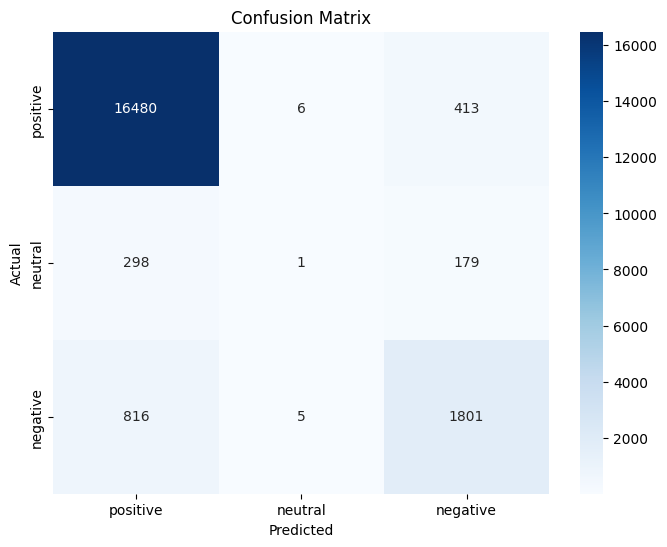

In [ ]:
# Hitung Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=['positive', 'neutral', 'negative'])

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['positive', 'neutral', 'negative'],
            yticklabels=['positive', 'neutral', 'negative'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [ ]:
def predict_sentiment(model, vectorizer, text):
    cleaned_text = preprocess_text(text)
    vectorized_text = vectorizer.transform([cleaned_text])
    prediction = model.predict(vectorized_text)
    return prediction[0]

# Contoh prediksi
new_review = "Aplikasi ini sangat membantu, tapi kadang lambat."
print(f"Prediksi sentimen: {predict_sentiment(model, vectorizer, new_review)}")


Prediksi sentimen: positive


In [ ]:
!pip install Sastrawi
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 90.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 1. Install library tambahan untuk membaca file Excel
!pip install openpyxl
!pip install Sastrawi

# 2. Import library yang dibutuhkan
import pandas as pd
import numpy as np
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 3. Upload dan baca file Excel
from google.colab import files
uploaded = files.upload()  # Upload kredivo.xlsx

# 4. Baca file Excel
df = pd.read_excel('kredivo.xlsx')

# 5. Periksa data awal
print("Informasi Dataset:")
print(df.info())

print("\nLima data pertama:")
print(df.head())

print("\nJumlah data:", len(df))

# 6. Cek missing values
print("\nMissing values:")
print(df.isnull().sum())

# 7. Fungsi preprocessing
def preprocess_text(text):
    # Pastikan input adalah string
    text = str(text)

    # Lowercase
    text = text.lower()

    # Hapus karakter khusus
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Hapus angka
    text = re.sub(r'\d+', '', text)

    # Stemming
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = stemmer.stem(text)

    # Stopword removal
    stop_factory = StopWordRemoverFactory()
    stopword = stop_factory.create_stop_word_remover()
    text = stopword.remove(text)

    return text

# 8. Terapkan preprocessing dan tampilkan contoh
print("\nContoh data sebelum preprocessing:")
print(df['content'].iloc[0])

df['processed_content'] = df['content'].apply(preprocess_text)

print("\nContoh data setelah preprocessing:")
print(df['processed_content'].iloc[0])

# 9. Konversi skor ke label sentimen
def score_to_sentiment(score):
    if score <= 2:
        return 'negative'
    elif score == 3:
        return 'neutral'
    else:
        return 'positive'

df['sentiment'] = df['score'].apply(score_to_sentiment)

print("\nDistribusi Sentimen:")
print(df['sentiment'].value_counts())

# 10. Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    df['processed_content'],
    df['sentiment'],
    test_size=0.2,
    random_state=42
)

# 11. Vectorization
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# 12. Train model
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

# 13. Evaluasi model
y_pred = model.predict(X_test_vectorized)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 14. Visualisasi confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['negative', 'neutral', 'positive'],
            yticklabels=['negative', 'neutral', 'positive'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# 15. Simpan model dan vectorizer
import pickle

# Simpan model
with open('sentiment_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Simpan vectorizer
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

# Download model dan vectorizer
files.download('sentiment_model.pkl')
files.download('vectorizer.pkl')

# 16. Fungsi untuk prediksi teks baru
def predict_sentiment_text(text):
    # Preprocess
    processed_text = preprocess_text(text)

    # Vectorize
    text_vectorized = vectorizer.transform([processed_text])

    # Predict
    prediction = model.predict(text_vectorized)[0]
    probabilities = model.predict_proba(text_vectorized)[0]

    return prediction, probabilities

# 17. Contoh prediksi
sample_text = "Kredivo sangat membantu sekali, proses cepat dan mudah"
prediction, probabilities = predict_sentiment_text(sample_text)

print(f"\nContoh Prediksi:")
print(f"Text: {sample_text}")
print(f"Sentiment: {prediction}")
print(f"Probabilities: {probabilities}")

# 18. Simpan hasil preprocessed data
df.to_excel('preprocessed_kredivo.xlsx', index=False)
files.download('preprocessed_kredivo.xlsx')

Saving Kredivo.xlsx to Kredivo (1).xlsx


FileNotFoundError: [Errno 2] No such file or directory: 'kredivo.xlsx'

In [ ]:
# 1. Install library tambahan untuk membaca file Excel
!pip install openpyxl
!pip install Sastrawi

# 2. Import library yang dibutuhkan
import pandas as pd
import numpy as np
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 3. Upload dan baca file Excel
from google.colab import files
uploaded = files.upload()  # Upload kredivo.xlsx

# 4. Baca file Excel
df = pd.read_excel('Kredivo.xlsx')

# 5. Periksa data awal
print("Informasi Dataset:")
print(df.info())

print("\nLima data pertama:")
print(df.head())

print("\nJumlah data:", len(df))

# 6. Cek missing values
print("\nMissing values:")
print(df.isnull().sum())

# 7. Fungsi preprocessing
def preprocess_text(text):
    # Pastikan input adalah string
    text = str(text)

    # Lowercase
    text = text.lower()

    # Hapus karakter khusus
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Hapus angka
    text = re.sub(r'\d+', '', text)

    # Stemming
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = stemmer.stem(text)

    # Stopword removal
    stop_factory = StopWordRemoverFactory()
    stopword = stop_factory.create_stop_word_remover()
    text = stopword.remove(text)

    return text

# 8. Terapkan preprocessing dan tampilkan contoh
print("\nContoh data sebelum preprocessing:")
print(df['Content'].iloc[0])

df['processed_Content'] = df['content'].apply(preprocess_text)

print("\nContoh data setelah preprocessing:")
print(df['processed_content'].iloc[0])

# 9. Konversi skor ke label sentimen
def score_to_sentiment(score):
    if score <= 2:
        return 'negative'
    elif score == 3:
        return 'neutral'
    else:
        return 'positive'

df['sentiment'] = df['score'].apply(score_to_sentiment)

print("\nDistribusi Sentimen:")
print(df['sentiment'].value_counts())

# 10. Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    df['processed_content'],
    df['sentiment'],
    test_size=0.2,
    random_state=42
)

# 11. Vectorization
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# 12. Train model
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

# 13. Evaluasi model
y_pred = model.predict(X_test_vectorized)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 14. Visualisasi confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['negative', 'neutral', 'positive'],
            yticklabels=['negative', 'neutral', 'positive'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# 15. Simpan model dan vectorizer
import pickle

# Simpan model
with open('sentiment_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Simpan vectorizer
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

# Download model dan vectorizer
files.download('sentiment_model.pkl')
files.download('vectorizer.pkl')

# 16. Fungsi untuk prediksi teks baru
def predict_sentiment_text(text):
    # Preprocess
    processed_text = preprocess_text(text)

    # Vectorize
    text_vectorized = vectorizer.transform([processed_text])

    # Predict
    prediction = model.predict(text_vectorized)[0]
    probabilities = model.predict_proba(text_vectorized)[0]

    return prediction, probabilities

# 17. Contoh prediksi
sample_text = "Kredivo sangat membantu sekali, proses cepat dan mudah"
prediction, probabilities = predict_sentiment_text(sample_text)

print(f"\nContoh Prediksi:")
print(f"Text: {sample_text}")
print(f"Sentiment: {prediction}")
print(f"Probabilities: {probabilities}")

# 18. Simpan hasil preprocessed data
df.to_excel('preprocessed_kredivo.xlsx', index=False)
files.download('preprocessed_kredivo.xlsx')

Saving Kredivo.xlsx to Kredivo (2).xlsx
Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99993 entries, 0 to 99992
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   UserName  99993 non-null  object        
 1   Score     99993 non-null  int64         
 2   At        99993 non-null  datetime64[ns]
 3   Content   99992 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 3.1+ MB
None

Lima data pertama:
          UserName  Score                  At  \
0  Pengguna Google      5 2024-09-08 02:58:00   
1  Pengguna Google      5 2024-09-08 02:58:00   
2  Pengguna Google      1 2024-09-08 02:56:00   
3  Pengguna Google      5 2024-09-08 02:55:00   
4  Pengguna Google      5 2024-09-08 02:54:00   

                                             Content  
0  Kredivo sangan membatu thebest bnget. Tapi ada...  
1                                          Membantu…  
2  

KeyError: 'content'

In [ ]:
# 1. Install library tambahan untuk membaca file Excel
!pip install openpyxl
!pip install Sastrawi

# 2. Import library yang dibutuhkan
import pandas as pd
import numpy as np
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 3. Upload dan baca file Excel
from google.colab import files
uploaded = files.upload()  # Upload kredivo.xlsx

# 4. Baca file Excel
df = pd.read_excel('Kredivo.xlsx')

# 5. Periksa data awal
print("Informasi Dataset:")
print(df.info())

print("\nLima data pertama:")
print(df.head())

print("\nJumlah data:", len(df))

# 6. Cek missing values
print("\nMissing values:")
print(df.isnull().sum())

# 7. Fungsi preprocessing
def preprocess_text(text):
    # Pastikan input adalah string
    text = str(text)

    # Lowercase
    text = text.lower()

    # Hapus karakter khusus
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Hapus angka
    text = re.sub(r'\d+', '', text)

    # Stemming
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = stemmer.stem(text)

    # Stopword removal
    stop_factory = StopWordRemoverFactory()
    stopword = stop_factory.create_stop_word_remover()
    text = stopword.remove(text)

    return text

# 8. Terapkan preprocessing dan tampilkan contoh
print("\nContoh data sebelum preprocessing:")
print(df['Content'].iloc[0])

df['processed_Content'] = df['Content'].apply(preprocess_text)

print("\nContoh data setelah preprocessing:")
print(df['processed_Content'].iloc[0])

# 9. Konversi skor ke label sentimen
def score_to_sentiment(score):
    if score <= 2:
        return 'negative'
    elif score == 3:
        return 'neutral'
    else:
        return 'positive'

df['sentiment'] = df['score'].apply(score_to_sentiment)

print("\nDistribusi Sentimen:")
print(df['sentiment'].value_counts())

# 10. Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    df['processed_Content'],
    df['sentiment'],
    test_size=0.2,
    random_state=42
)

# 11. Vectorization
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# 12. Train model
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

# 13. Evaluasi model
y_pred = model.predict(X_test_vectorized)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 14. Visualisasi confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['negative', 'neutral', 'positive'],
            yticklabels=['negative', 'neutral', 'positive'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# 15. Simpan model dan vectorizer
import pickle

# Simpan model
with open('sentiment_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Simpan vectorizer
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

# Download model dan vectorizer
files.download('sentiment_model.pkl')
files.download('vectorizer.pkl')

# 16. Fungsi untuk prediksi teks baru
def predict_sentiment_text(text):
    # Preprocess
    processed_text = preprocess_text(text)

    # Vectorize
    text_vectorized = vectorizer.transform([processed_text])

    # Predict
    prediction = model.predict(text_vectorized)[0]
    probabilities = model.predict_proba(text_vectorized)[0]

    return prediction, probabilities

# 17. Contoh prediksi
sample_text = "Kredivo sangat membantu sekali, proses cepat dan mudah"
prediction, probabilities = predict_sentiment_text(sample_text)

print(f"\nContoh Prediksi:")
print(f"Text: {sample_text}")
print(f"Sentiment: {prediction}")
print(f"Probabilities: {probabilities}")

# 18. Simpan hasil preprocessed data
df.to_excel('preprocessed_Kredivo.xlsx', index=False)
files.download('preprocessed_Kredivo.xlsx')

Saving Kredivo.xlsx to Kredivo (3).xlsx
Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99993 entries, 0 to 99992
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   UserName  99993 non-null  object        
 1   Score     99993 non-null  int64         
 2   At        99993 non-null  datetime64[ns]
 3   Content   99992 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 3.1+ MB
None

Lima data pertama:
          UserName  Score                  At  \
0  Pengguna Google      5 2024-09-08 02:58:00   
1  Pengguna Google      5 2024-09-08 02:58:00   
2  Pengguna Google      1 2024-09-08 02:56:00   
3  Pengguna Google      5 2024-09-08 02:55:00   
4  Pengguna Google      5 2024-09-08 02:54:00   

                                             Content  
0  Kredivo sangan membatu thebest bnget. Tapi ada...  
1                                          Membantu…  
2  

In [ ]:
pip install notebook


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.0 MB/s eta 0:00:00


In [2]:
!pip install streamlit
!pip install pyngrok
!pip install gradio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 73.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
import pandas as pd

# Contoh data (ganti dengan dataset Anda)
data = {
    "Content": ["Aplikasi bagus", "Tidak suka aplikasi ini", "Sangat membantu", "Buruk sekali"],
    "Sentiment": [1, 0, 1, 0]  # 1=Positive, 0=Negative
}
df = pd.DataFrame(data)

# Split data
X = df["Content"]
y = df["Sentiment"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat dan melatih model
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(X_train, y_train)


Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [5]:
import joblib

# Menyimpan model ke file
joblib.dump(model, 'sentiment_model.pkl')
print("Model berhasil disimpan!")


Model berhasil disimpan!


In [6]:
# Memuat model
model = joblib.load('sentiment_model.pkl')

# Contoh prediksi
text = "Aplikasi ini sangat membantu"
prediction = model.predict([text])
print(f"Prediksi Sentimen: {prediction}")


Prediksi Sentimen: [1]


In [7]:
import gradio as gr
import joblib

# Load model yang sudah disimpan
model = joblib.load('sentiment_model.pkl')

# Fungsi prediksi
def predict_sentiment(text):
    # Lakukan preprocessing jika perlu
    # Misalnya: text = preprocess_text(text)
    prediction = model.predict([text])
    if prediction == 0:
        return "Negative"
    elif prediction == 1:
        return "Neutral"
    else:
        return "Positive"

# Membuat antarmuka dengan Gradio
interface = gr.Interface(
    fn=predict_sentiment,
    inputs="text",
    outputs="label",
    title="Sentiment Analysis for Kredivo Reviews",
    description="Masukkan ulasan Anda untuk melihat prediksi sentimen (Positive, Neutral, Negative)."
)

# Menjalankan aplikasi
interface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://510e2a11c869dd4bcb.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
